In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import files
import acquire
# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 


# holt's linear trend model. 
from statsmodels.tsa.api import Holt

plt.rc('figure', figsize=(13, 7))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

## Project Goal

The goal of this project is to  accurately predict Consumer Price Index for  Metropolitan area with time series analysis.

## Project Description

The cost of living and inflation is on the rise.  United States citizens want to find the home that works best for them.  We will analayze data of historical Consumer Price Index (CPI) data from the years 2009 to 2021. The data will be helpful to forecast future CPI. 

The Consumer Price Index (CPI) is a measure of the average change in prices over time in a fixed market basket of goods and services.

## Data Dictionary

| Feature    | Description                                        |
|------------|----------------------------------------------------|
| Jan        | January                                            |
| Feb        | February                                           |
| Mar        | March                                              |
| Apr        | April                                              |
| May        | May                                                |
| Jun        | June                                               |
| Jul        | July                                               |
| Aug        | August                                             |
| Sep        | September                                          |
| Oct        | October                                            |
| Nov        | November                                           |
| Dec        | December                                           |
| CPI        | Consumer Price Index                               |
| HALF1      | CPI average for first half of corresponding year.  |
| HALF2      | CPI average for second half of corresponding year. |
| Annual     | CPI average of corresponding year.                 |
| Year       | Year in numeric format                             |
| year_month | Time format as Year and month                      |

## Initial Questions

- Does the Houston's CPI ?

- Is there seasonality in the CPI?

- What times of the year does CPI change?

## Acquire

In [2]:
houston_overall_cpi = acquire.get_houston_overall_cpi()

houston_overall_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2009.0,NaN,187.972,NaN,189.701,NaN,192.325,NaN,191.687,NaN,191.608,NaN,190.932,190.495,189.465,191.525
1,2010.0,NaN,192.412,NaN,194.037,NaN,194.734,NaN,195.165,NaN,195.094,NaN,194.479,194.172,193.410,194.934
2,2011.0,NaN,197.224,NaN,201.624,NaN,201.309,NaN,202.445,NaN,201.398,NaN,200.477,200.495,199.480,201.509
3,2012.0,NaN,204.291,NaN,206.088,NaN,204.829,NaN,203.959,NaN,204.139,NaN,202.477,204.213,204.705,203.721
4,2013.0,NaN,205.716,NaN,207.506,NaN,207.882,NaN,208.575,NaN,207.788,NaN,209.814,207.574,206.583,208.564
5,2014.0,NaN,211.745,NaN,213.309,NaN,214.668,NaN,214.102,NaN,214.791,NaN,212.169,213.365,212.835,213.895
6,2015.0,NaN,210.283,NaN,212.439,NaN,213.896,NaN,214.652,NaN,214.569,NaN,212.936,213.039,211.926,214.152
7,2016.0,NaN,214.505,NaN,215.513,NaN,217.305,NaN,216.582,NaN,218.200,NaN,217.758,216.414,215.237,217.592
8,2017.0,NaN,219.061,NaN,219.852,NaN,220.805,NaN,221.255,NaN,223.213,NaN,221.568,220.657,219.513,221.800
9,2018.0,NaN,224.711,NaN,225.116,NaN,227.393,NaN,226.307,NaN,228.070,NaN,226.557,225.927,224.763,227.091


After importing the data:

- There is 16 columns and 13 rows.

- Six of the month columns are filled with nulls due to the agency's regional office only recording CPI every other month.

- Every value in every column besides `Year` represents CPI measurment recorded per time period. 

Things to do:

- Imput nulls 

- Drop unnecessary columns

- Transform data by melting columns by year and month to expand data vertically

- Set index to time


## Preparation

In [3]:
df = acquire.prep_houston_overall()

df

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,month,CPI
year_month,,,
2009-01-01,2009,Jan,189.465
2009-02-01,2009,Feb,187.972
2009-03-01,2009,Mar,189.465
2009-04-01,2009,Apr,189.701
2009-05-01,2009,May,189.465
...,...,...,...
2021-08-01,2021,Aug,241.088
2021-09-01,2021,Sep,242.696
2021-10-01,2021,Oct,243.813


<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

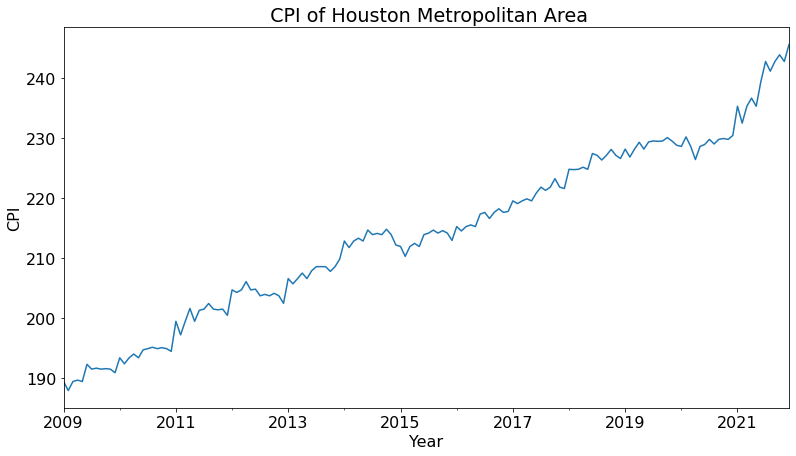

In [4]:
# Plot time series data
df.CPI.plot()
plt.title(' CPI of Houston Metropolitan Area')
plt.xlabel('Year')
plt.ylabel('CPI')
plt

Actions taken:

- Replaced the months in the of first half of the year with the value  of `HALF1` for the correpsonding year

- Replaced the months in the  of second half of the year with the value  of `HALF2` for the correpsonding year

- Dropped columns "Annual", "HALF1", "HALF2"

- Utilized pd.melt() to expand data vertically

- Converted data index to date time column and sorted in ascending order

Overview of Refined data:

- There is 3 columns and 156 rows.

- No nulls values


## Splitting the data

In [5]:
train, validate, test = acquire.split_data(df)

 df - (156, 3).
 train - (72, 3).
 validate - (72, 3).
 test - (12, 3).


/Users/swooshisdakid/codeup-data-science/individiual-project/acquire.py:64: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2021']


<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

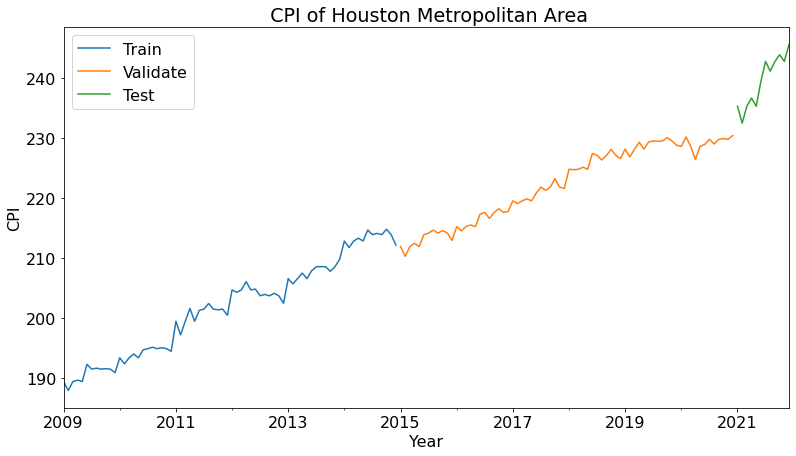

In [6]:
# Visualize the split data samples

train.resample('M').CPI.mean().plot()
validate.resample('M').CPI.mean().plot()
test.resample('M').CPI.mean().plot()
plt.legend(['Train', 'Validate', 'Test'])
plt.title(' CPI of Houston Metropolitan Area')
plt.xlabel('Year')
plt.ylabel('CPI')
plt

Actions taken:

- Data was split into three samples
    - Train 3 columns and 72 rows   equivalent to 6 years of data (2009 - 2014)
    - Validate 3 columns and 72 rows equivelent to 6 years of data (2015 - 2020)
    - Test 3 columns and 12 rows equivelent to one year of data (2021)

## Exploration of Train Sample

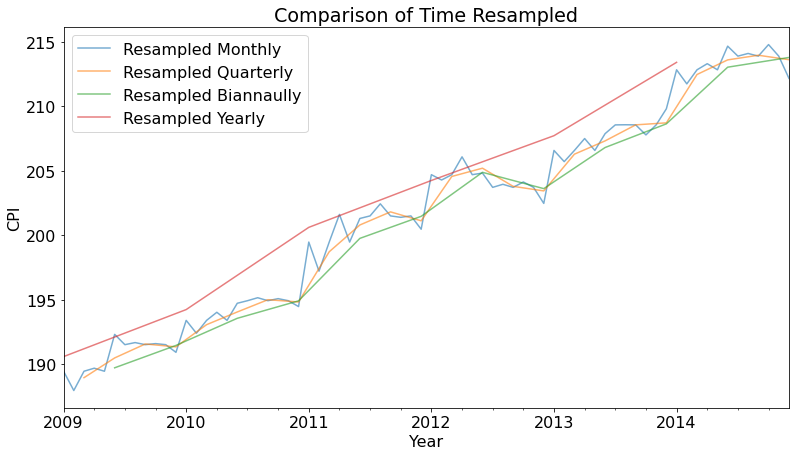

In [16]:
train.resample('M',closed='left').CPI.mean().plot(label='Resampled Monthly', alpha=.6)
train.resample('3M',closed='left').CPI.mean().plot(label='Resampled Quarterly', alpha=.6)
train.resample('6M',closed='left').CPI.mean().plot(label='Resampled Biannaully', alpha=.6)
train.resample('Y',closed='left').CPI.mean().plot(label='Resampled Yearly', alpha=.6)
plt.title('Comparison of Time Resampled')
plt.ylabel('CPI')
plt.xlabel('Year')
plt.legend()

In [30]:
# y is the resampled monthly data:

y = train.resample('M').CPI.mean()


[Text(0.5, 1.0, 'Yearly % Change in CPI'),
 Text(0, 0.5, '% Change'),
 Text(0.5, 0, '')]

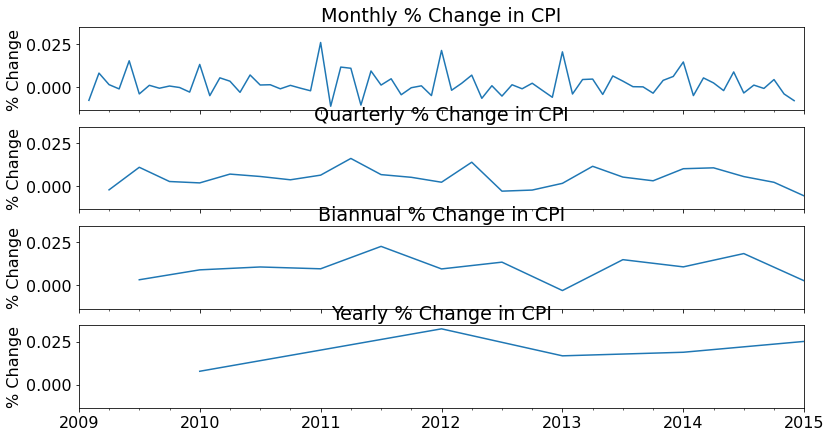

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True)

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax1)
ax1.set(title='Monthly % Change in CPI', ylabel='% Change', xlabel='')

quarterly = y.resample('3M').mean()
(quarterly.diff() / quarterly.shift()).plot(ax=ax2)
ax2.set(title='Quarterly % Change in CPI', ylabel='% Change', xlabel='')

biannual = y.resample('6M').mean()
(biannual.diff() / biannual.shift()).plot(ax=ax3)
ax3.set(title='Biannual % Change in CPI', ylabel='% Change', xlabel='')

yearly = y.resample('12M').mean()
(yearly.diff() / yearly.shift()).plot(ax=ax4)
ax4.set(title='Yearly % Change in CPI', ylabel='% Change', xlabel='')

***Takeaway**
- Seeems to be seasonallity for reseampling
- Theres seasonality every 3 months

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

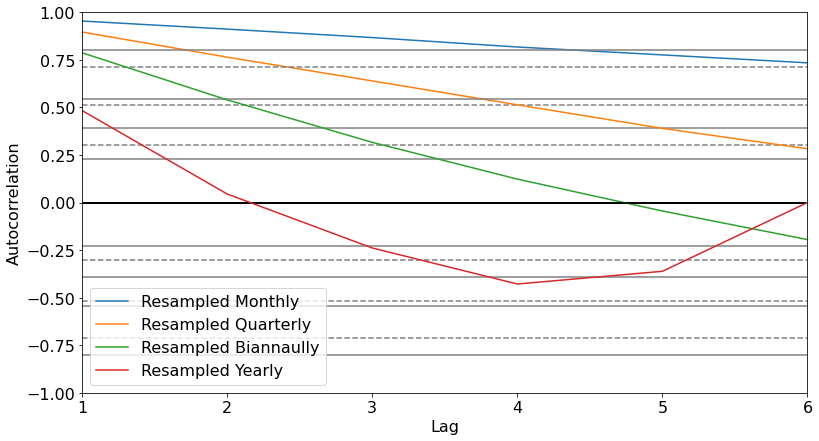

In [29]:
pd.plotting.autocorrelation_plot(y.resample('M').mean(),label='Resampled Monthly')
pd.plotting.autocorrelation_plot(y.resample('3M').mean(),label='Resampled Quarterly' )
pd.plotting.autocorrelation_plot(y.resample('6M').mean(), label='Resampled Biannaully' )
pd.plotting.autocorrelation_plot(y.resample('Y').mean(), label='Resampled Yearly')

***Takeaway**

As time progresses the correlation get weaker.

Yearly seems to have better correlation over other time samples .

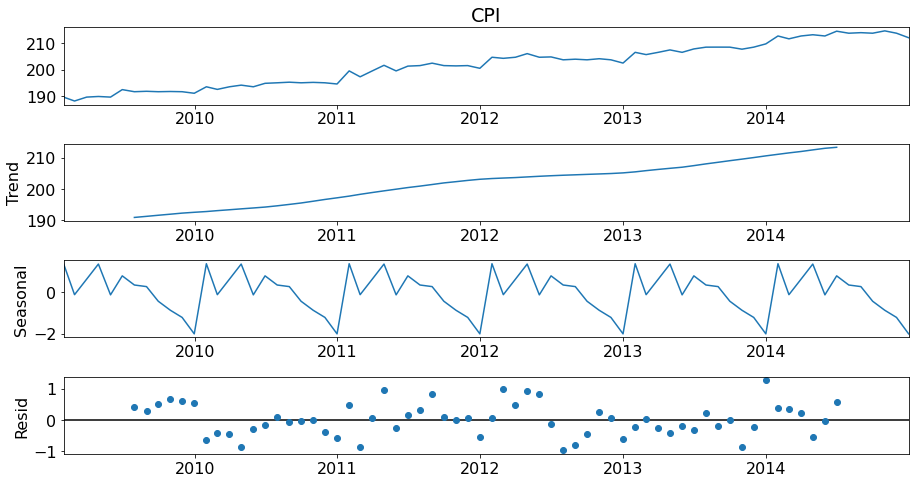

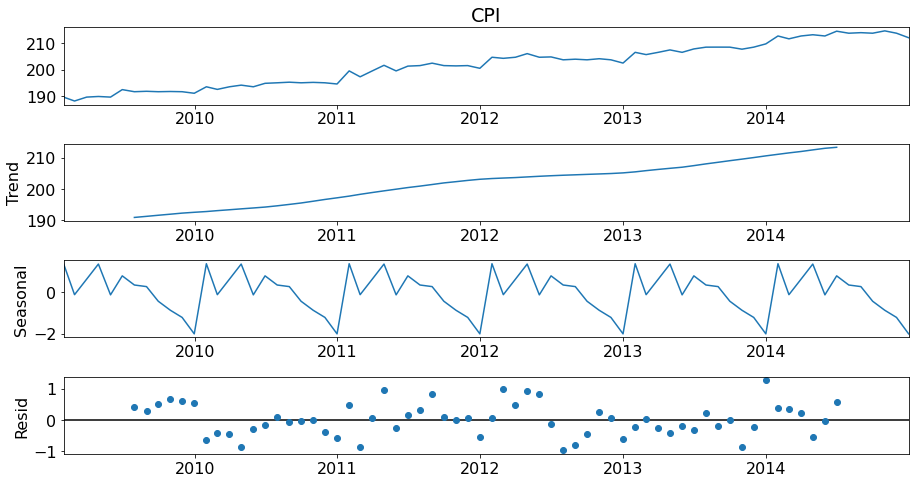

In [33]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()


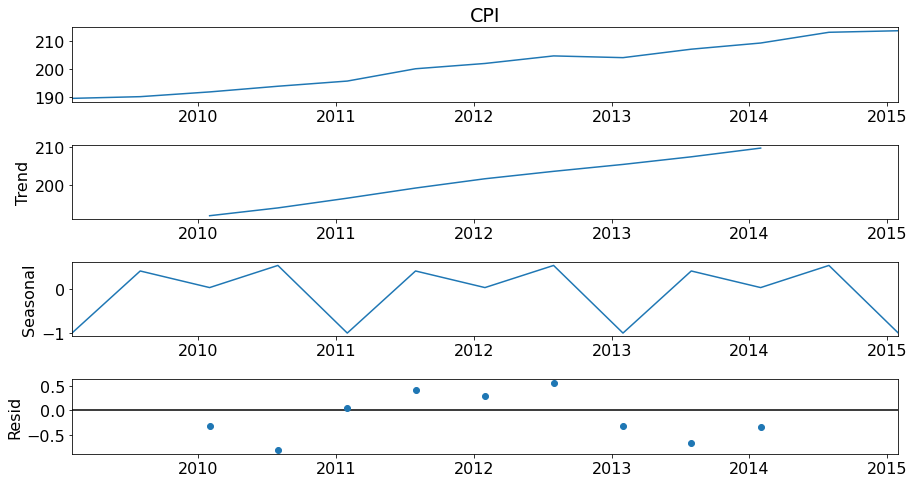

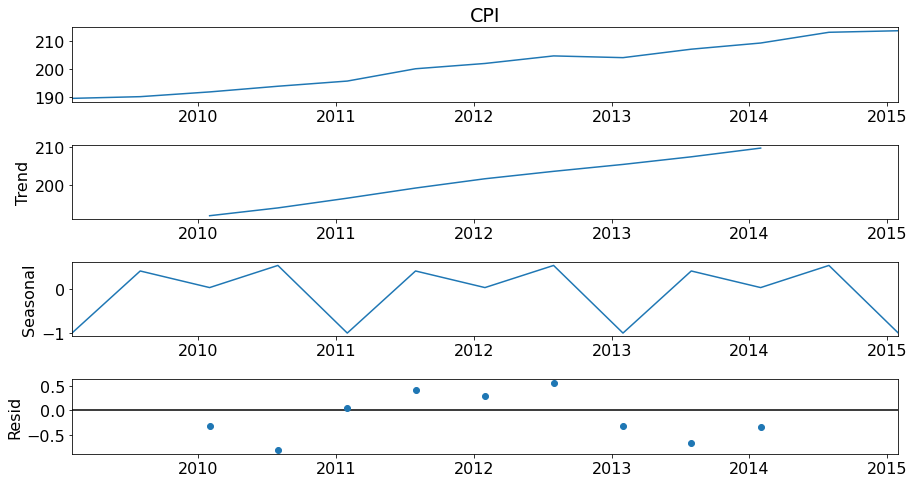

In [34]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('6M').mean()).plot()

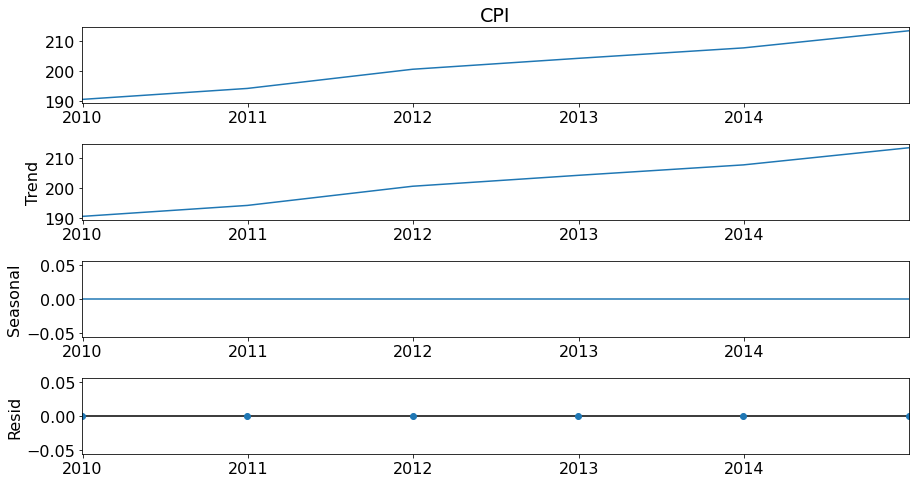

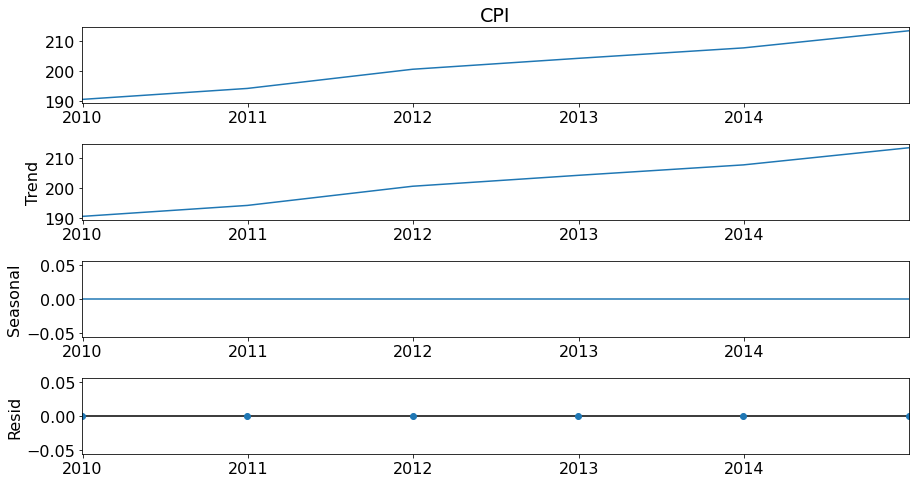

In [35]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('Y').mean()).plot()

<AxesSubplot:xlabel='month', ylabel='CPI'>

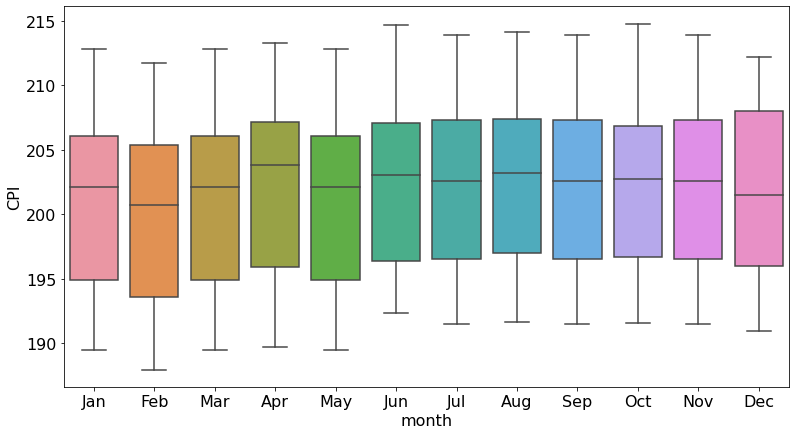

In [37]:
# CPI by month
sns.boxplot(data = train, x = 'month', y = 'CPI')

<AxesSubplot:xlabel='Year', ylabel='CPI'>

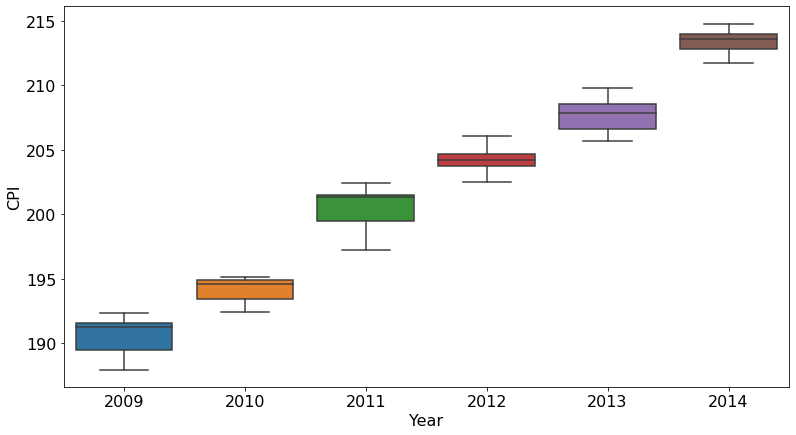

In [38]:
# CPI by Year
sns.boxplot(data = train, x = 'Year', y = 'CPI')

## Modeling

In [39]:
# evaluate() will compute the Mean Squared Error and the Root Mean Squared Error to evaluate.
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 3)
    return rmse
# plot_and_eval() will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last Oberserved Value

In [40]:
# take the last observation of CPI and assign to variable
last_cpi = train['CPI'][-1:][0]
yhat_df = pd.DataFrame({'CPI': [last_cpi]}, index=validate.index)
eval_df = append_eval_df(model_type = 'last_observed_value', target_var = 'CPI')

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


### Simple Average

In [41]:
# compute simple average
avg_cpi = round(train['CPI'].mean(), 2)
#Apply predictions to our observations
def make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'CPI': [avg_cpi]}, index=validate.index)
    return yhat_df
yhat_df = make_predictions(avg_cpi)
eval_df = append_eval_df(model_type = 'simple_average', target_var = 'CPI')

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


### Moving Average

In [42]:
#Apply predictions to our observations
def moving_avg_make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'CPI': [rolling_cpi]}, index=validate.index)
    return yhat_df
# Loop of periods
periods = [1, 2, 3, 4, 6, 12, 24]

for p in periods: 
    rolling_cpi = round(train['CPI'].rolling(p).mean()[-1], 2)
    
    yhat_df = moving_avg_make_predictions(rolling_cpi)
    model_type = str(p) + '_month_moving_avg'
    eval_df = append_eval_df(model_type = model_type , target_var = 'CPI')


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

### Holts Linear Trend

In [43]:
model = Holt(train['CPI'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_cpi = model.predict(start = validate.index[0], end = validate.index[-1])
yhat_df['CPI'] = round(yhat_cpi, 2)
eval_df = append_eval_df(model_type = 'holts_optimized', target_var = "CPI")

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/1702116379.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['CPI'], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


### Previous Cycle

In [44]:
x = range(72)
for n in x:
    yhat_df = train.CPI[:'2015' ] + train.CPI.diff(n).mean()
    yhat_df.index = validate.index
    yhat_df = pd.DataFrame(yhat_df)
    #print(f"{n} past months cycle.")
    #plot_and_eval(target_var = 'CPI')
    eval_df = append_eval_df(model_type = (f"{n}_past_months"), target_var = 'CPI')

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3918451904.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

### Which model performed the best

In [45]:
eval_df.sort_values(by=['rmse'], ascending=True)

,model_type,target_var,rmse
9,holts_optimized,CPI,1.762
65,55_past_months,CPI,2.565
66,56_past_months,CPI,2.586
64,54_past_months,CPI,2.593
63,53_past_months,CPI,2.676
...,...,...,...
13,3_past_months,CPI,19.713
12,2_past_months,CPI,20.087
11,1_past_months,CPI,20.459
10,0_past_months,CPI,20.777


**Takeaway**

The Holts_optimized model performed the best with a RMSE of 1.72 and simple_average model performed the worst with a RMSE of 21.54.

### Test best Model

In [46]:
# evaluation function to compute rmse
def evaluate_test(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse
model = Holt(train['CPI'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_cpi = model.predict(start = test.index[0], end = test.index[-1])
yhat_cpi = pd.DataFrame(yhat_cpi)
yhat_cpi.rename(columns={0 : 'CPI'}, inplace=True)
# set yhat_df to index of test
yhat_df = pd.DataFrame({'CPI': [range(12)]},index=test.index)
yhat_df['CPI'] = round(yhat_cpi, 2)

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_62592/3925984701.py:5: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['CPI'], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


CPI -- RMSE: 8


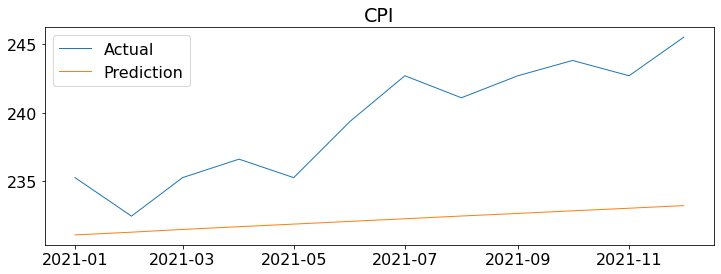

In [47]:
def plot_and_eval_test(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(test[target_var], label='Actual', linewidth=1)
    plt.plot(yhat_df[target_var], label='Prediction', linewidth=1)
    plt.title(target_var)
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.legend()
    plt.show()
plot_and_eval_test(target_var = "CPI")

### Conclusion



- Summary of the project
    - The Holts model performed on `test` sample by a margin of error of 8.
    - Looking at the predictions plot, The model is underperforming and will continue to increase with a margin of error over time.
    - I belive the decrease in the models performance has to do with the vass difference of `train` and `test`. The `train` sample size is six time greater.
    - I believe the model initally performed with a small margin of error due to both `train` and `validate` are the same size.


- Recommendation
    - Train the holts model on smaller periods of time to improve efficiency

- Next Steps
    - Add other elements of CPI for categories like rent, unleaded gasoline, electricity, 
    - Figure a way to incorparte population to the data. Population tends to impact the CPi
    - Information about wages of workers in region
    - Acquire 2022 year data to do further analysis once modifications of model is completed